In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
import os
data_dir = './data'

folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    file_count = len(os.listdir(folder_path))
    print(f"{folder} : {file_count} ")


elamor : 42 
jesusdespojado : 64 
laamargura : 54 
laestrella : 73 
lahiniesta : 100 
lapaz : 100 
sanroque : 45 


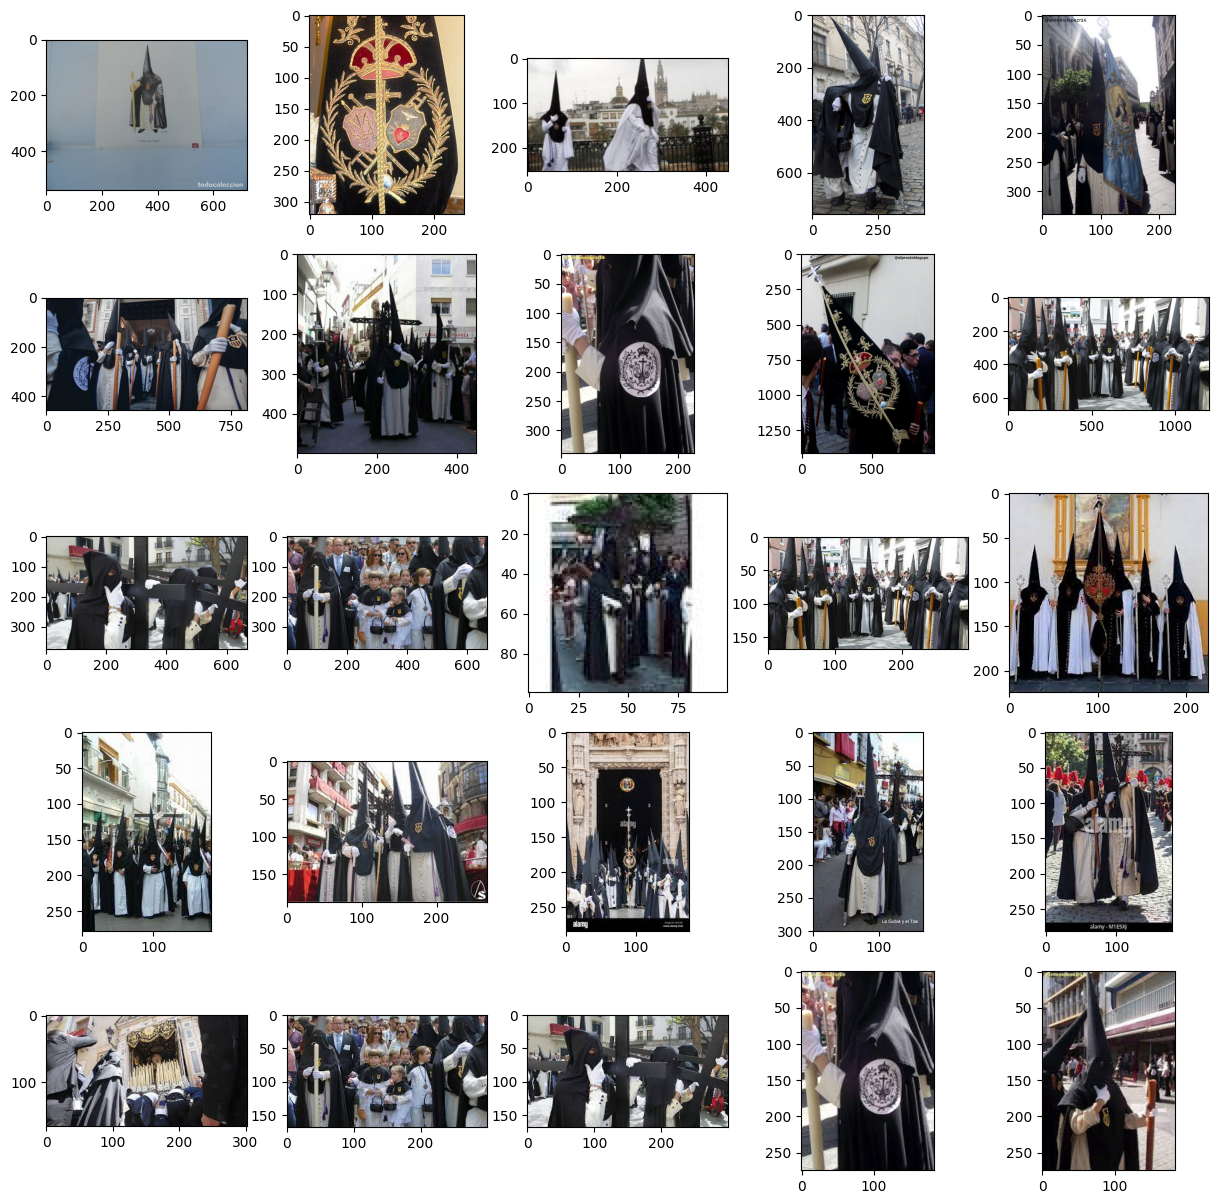

In [14]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = './data/jesusdespojado'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [15]:
import os
import shutil

carpeta_fuente = './data'
carpeta_destino = './dataset'

carpetas = os.listdir(carpeta_fuente)

for carpeta in carpetas:
    if not carpeta.startswith("."):
        imagenes = os.listdir(carpeta_fuente + '/' + carpeta)

        for i, nombreimg in enumerate(imagenes):
            if i < 42:
                if not nombreimg.startswith("."):
                    shutil.copy(carpeta_fuente + '/' + carpeta + '/' + nombreimg, carpeta_destino + '/' + carpeta + '/' + nombreimg)

In [16]:
import os
data_dir = './dataset'

folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    file_count = len(os.listdir(folder_path))
    print(f"{folder} : {file_count} ")


elamor : 42 
jesusdespojado : 42 
laamargura : 42 
laestrella : 42 
lahiniesta : 42 
lapaz : 42 
sanroque : 42 


In [17]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('./dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('./dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')




Found 237 images belonging to 7 classes.
Found 56 images belonging to 7 classes.


In [18]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [19]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [20]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(7, activation='softmax')
])

In [21]:
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 7)                 8967      
                                                                 
Total params: 2266951 (8.65 MB)
Trainable params: 8967 (35.03 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [22]:

#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
import spicy

#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50



8/8 [==============================] - 24s 2s/step - loss: 2.0927 - accuracy: 0.1730 - val_loss: 1.8719 - val_accuracy: 0.1786
Epoch 2/50
8/8 [==============================] - 9s 1s/step - loss: 1.6674 - accuracy: 0.3713 - val_loss: 1.6618 - val_accuracy: 0.3750
Epoch 3/50
8/8 [==============================] - 9s 1s/step - loss: 1.4781 - accuracy: 0.4388 - val_loss: 1.4244 - val_accuracy: 0.5357
Epoch 4/50
8/8 [==============================] - 8s 1s/step - loss: 1.3653 - accuracy: 0.5232 - val_loss: 1.4317 - val_accuracy: 0.4286
Epoch 5/50
8/8 [==============================] - 8s 1s/step - loss: 1.1327 - accuracy: 0.6245 - val_loss: 1.2120 - val_accuracy: 0.5536
Epoch 6/50
8/8 [==============================] - 8s 1s/step - loss: 1.0217 - accuracy: 0.6498 - val_loss: 1.1248 - val_accuracy: 0.5893
Epoch 7/50
8/8 [==============================] - 8s 1s/step - loss: 0.9356 - accuracy: 0.6835 - val_loss: 1.1164 - val_accuracy: 0.6071
Epoch 8/50
8/8 [==============================] - 8

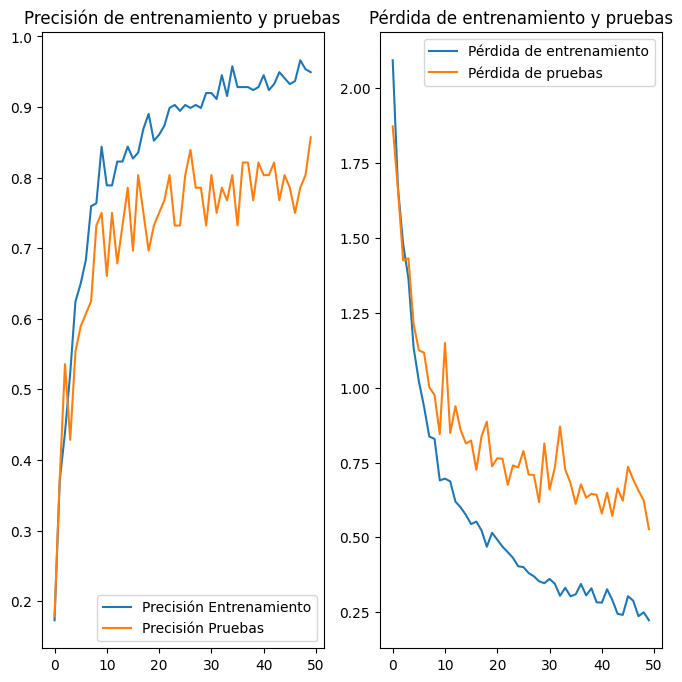

In [24]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [52]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [53]:
hermandades = {0:"EL AMOR", 1:"JESUS DESPOJADO", 2:"LA AMARGURA", 3:"LA ESTRELLA", 4:"LA HINIESTA", 5:"LA PAZ", 6:"SAN ROQUE"}


In [49]:
#0 = jesus, 1 = hiniesta, 2 = paz
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjloCNXVbKHmjkDOZiECiazV5J3MpHjxtu5A&usqp=CAU' #debe ser la hiniesta
prediccion = categorizar (url)
print(hermandades[prediccion])

1/1 [==============================] - 0s 58ms/step
LA HINIESTA


In [57]:
from tensorflow.keras.models import save_model

save_model(modelo, './models/modeloDDR.h5')

C:\Users\super\AppData\Local\Temp\ipykernel_13684\865567282.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(modelo, './models/modeloDDR.h5')


In [54]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def categorizar_local(ruta_imagen):
    img = cv2.imread(ruta_imagen)
    
    if img is None:
        raise Exception(f"No se pudo cargar la imagen en {ruta_imagen}")
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = img.reshape(-1, 224, 224, 3)
    prediccion = modelo.predict(img)
    return np.argmax(prediccion[0], axis=-1)

In [55]:
ruta_imagen = 'C:\\Users\\super\\OneDrive\\Escritorio\\Captura de pantalla 2024-01-17 184200.png'
print(hermandades[categorizar_local(ruta_imagen)])

1/1 [==============================] - 0s 69ms/step
LA AMARGURA
